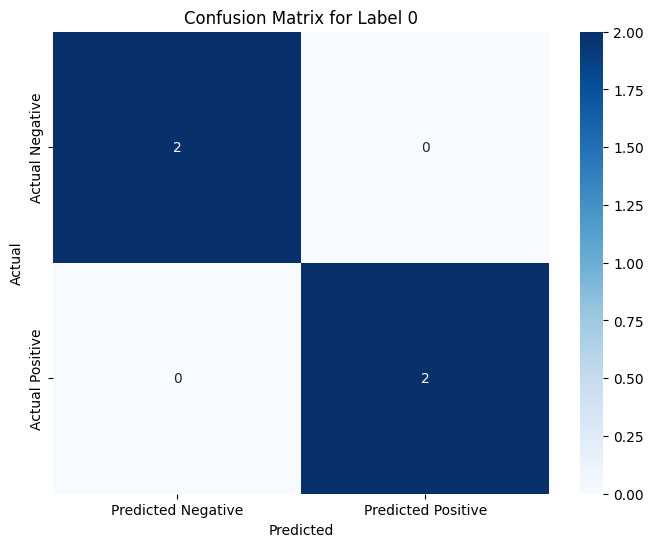

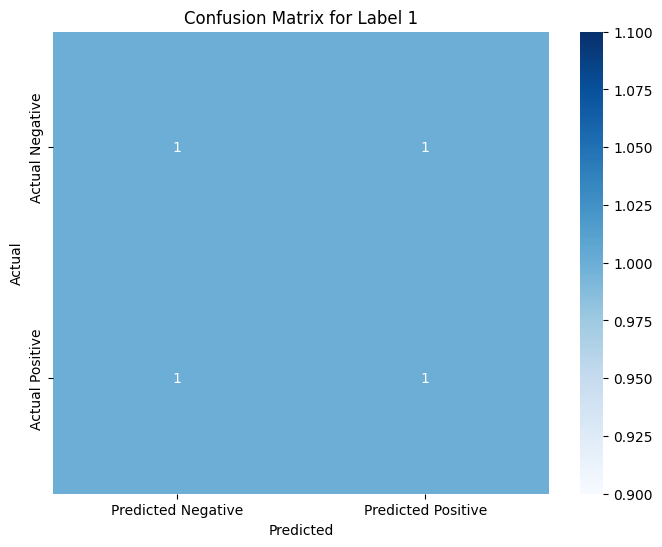

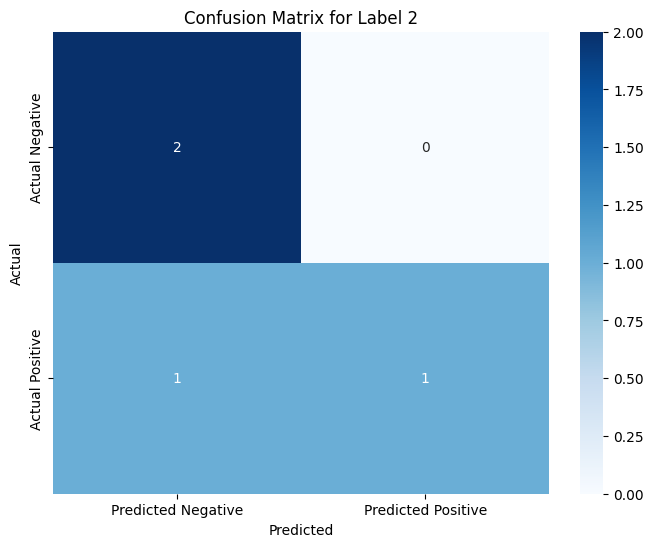

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# 예제 데이터
y_true = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1]])  # 실제 라벨
y_pred = np.array([[1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1]])  # 예측 라벨

# 라벨 별 혼돈 행렬 생성
mcm = multilabel_confusion_matrix(y_true, y_pred)

# 혼돈 행렬 시각화 함수
def plot_confusion_matrix(cm, labels, title):
    df_cm = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 각 라벨에 대해 혼돈 행렬 시각화
for i, cm in enumerate(mcm):
    plot_confusion_matrix(cm, labels=['Negative', 'Positive'], title=f'Confusion Matrix for Label {i}')



Labels shape: (500, 8)


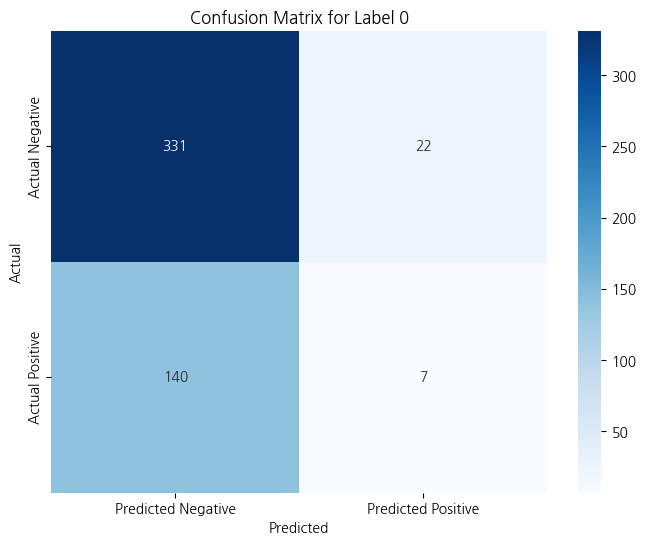

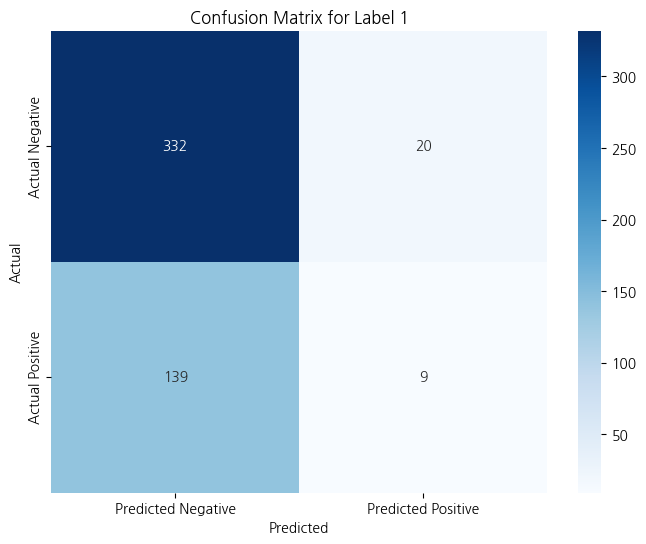

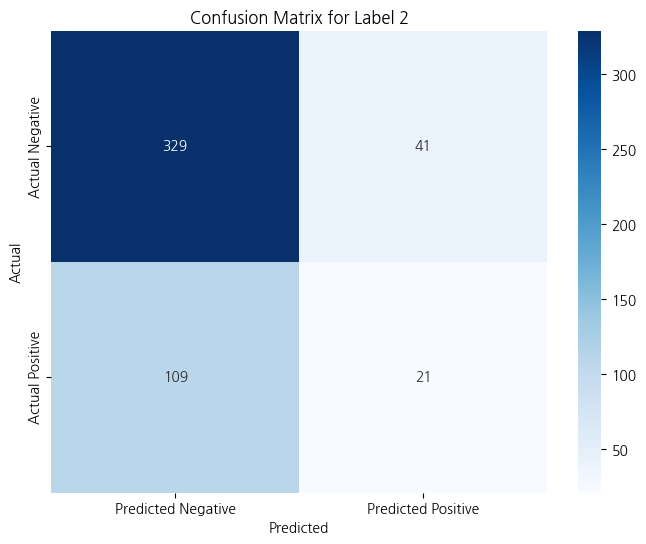

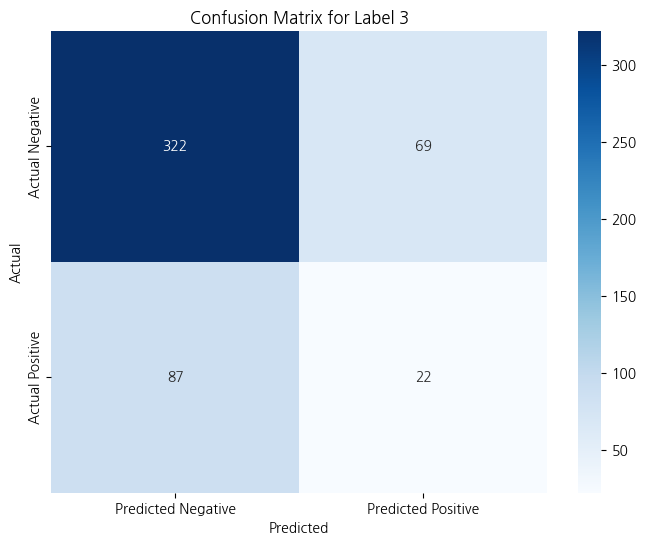

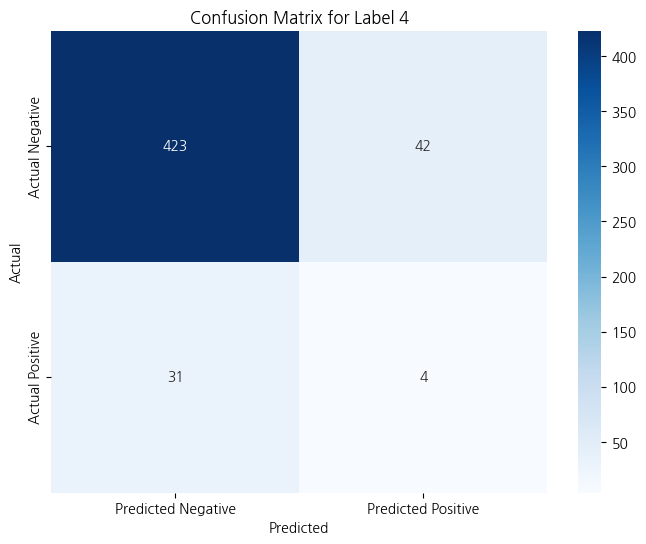

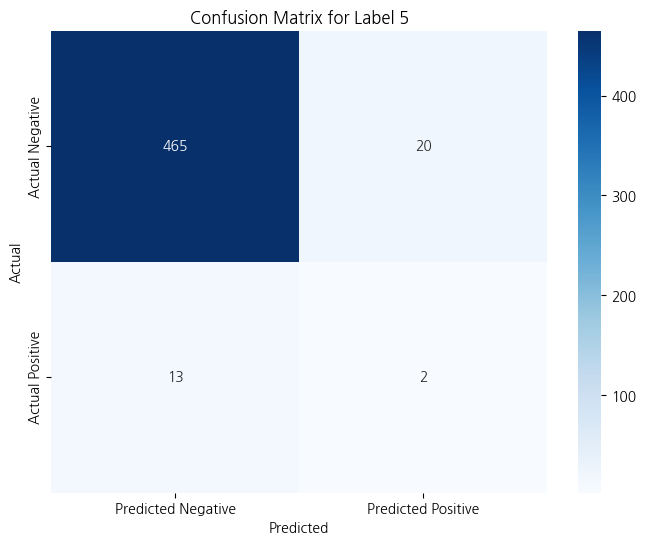

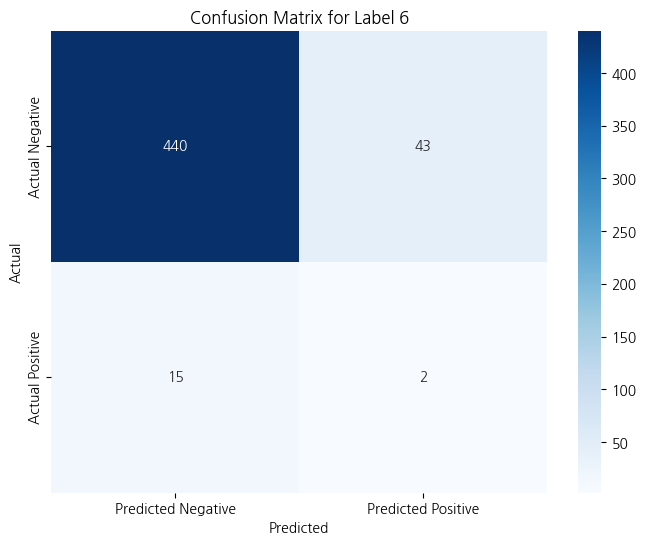

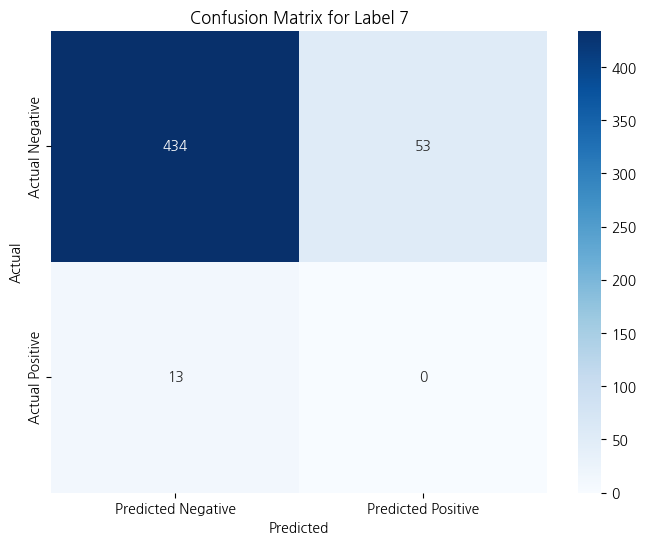

In [10]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import torch.nn as nn

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 정의 및 로드
model = models.resnet50()
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.4),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.4),
    nn.Linear(256, 8)  # 클래스 수에 맞게 수정
)
model.load_state_dict(torch.load('val_acc_best_model_v7.pth'))
model = model.to(device)
model.eval()

# 데이터셋 클래스 정의
class ClothesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.transform = transform
        self.image_paths = df['Image Path'].to_numpy()
        self.labels = df.iloc[:, 1:-1].to_numpy()
        print(f'Labels shape: {self.labels.shape}')
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None

        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

def collate_fn(batch):
    batch = [item for item in batch if item[0] is not None]
    if len(batch) == 0:
        print("No valid items in batch")
        return torch.Tensor(), torch.Tensor()
    return torch.utils.data.dataloader.default_collate(batch)

# 데이터프레임 로드 및 샘플링
df = pd.read_csv('cut_image_labeling_dataset.csv')
df_sampled = df.sample(n=500, random_state=42).reset_index(drop=True)

# 데이터셋 및 데이터로더 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = ClothesDataset(df_sampled, transform=transform)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0)

# 예측 수행 및 실제 라벨 수집
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        preds = (outputs > 0.5).float()
        
        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds.cpu().numpy())

all_labels = np.vstack(all_labels)
all_preds = np.vstack(all_preds)

# 혼돈 행렬 계산
mcm = multilabel_confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 시각화 함수
def plot_confusion_matrix(cm, labels, title):
    df_cm = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 각 라벨에 대해 혼돈 행렬 시각화
for i, cm in enumerate(mcm):
    plot_confusion_matrix(cm, labels=['Negative', 'Positive'], title=f'Confusion Matrix for Label {i}')


Labels shape: (500, 8)


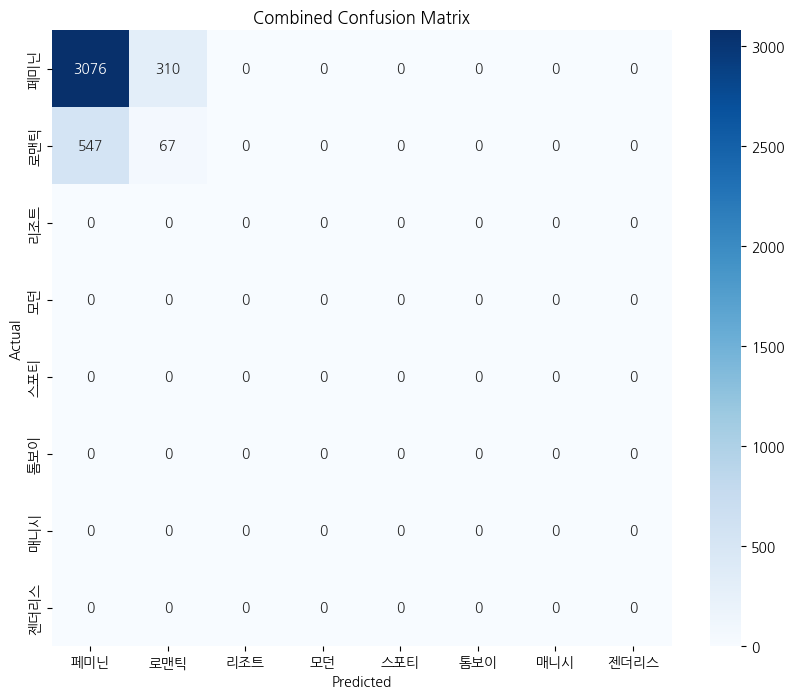

In [11]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import torch.nn as nn
import koreanize_matplotlib
# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 정의 및 로드
model = models.resnet50()
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.4),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.4),
    nn.Linear(256, 8)  # 클래스 수에 맞게 수정
)
model.load_state_dict(torch.load('val_acc_best_model_v7.pth'))
model = model.to(device)
model.eval()

# 데이터셋 클래스 정의
class ClothesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.transform = transform
        self.image_paths = df['Image Path'].to_numpy()
        self.labels = df.iloc[:, 1:-1].astype(np.float32).to_numpy()  # 이 부분에서 타입 변환 추가
        print(f'Labels shape: {self.labels.shape}')
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None

        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

def collate_fn(batch):
    batch = [item for item in batch if item[0] is not None]
    if len(batch) == 0:
        print("No valid items in batch")
        return torch.Tensor(), torch.Tensor()
    return torch.utils.data.dataloader.default_collate(batch)

# 데이터프레임 로드 및 샘플링
df = pd.read_csv('cut_image_labeling_dataset.csv')
df_sampled = df.sample(n=500, random_state=42).reset_index(drop=True)

# 데이터셋 및 데이터로더 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = ClothesDataset(df_sampled, transform=transform)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0, collate_fn=collate_fn)

# 예측 수행 및 실제 라벨 수집
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        preds = (outputs > 0.5).float()
        
        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds.cpu().numpy())

all_labels = np.vstack(all_labels)
all_preds = np.vstack(all_preds)

# 클래스별 혼돈 행렬 계산 및 시각화
def plot_combined_confusion_matrix(y_true, y_pred, class_names):
    num_classes = len(class_names)
    combined_cm = np.zeros((num_classes, num_classes), dtype=int)
    
    for true_labels, pred_labels in zip(y_true, y_pred):
        for true_label, pred_label in zip(true_labels, pred_labels):
            combined_cm[int(true_label), int(pred_label)] += 1
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(combined_cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Combined Confusion Matrix')
    plt.show()

class_names = df.columns[1:-1].tolist()  # 첫 번째 열은 이미지 경로이므로 제외
plot_combined_confusion_matrix(all_labels, all_preds, class_names)


Labels shape: (500, 8)


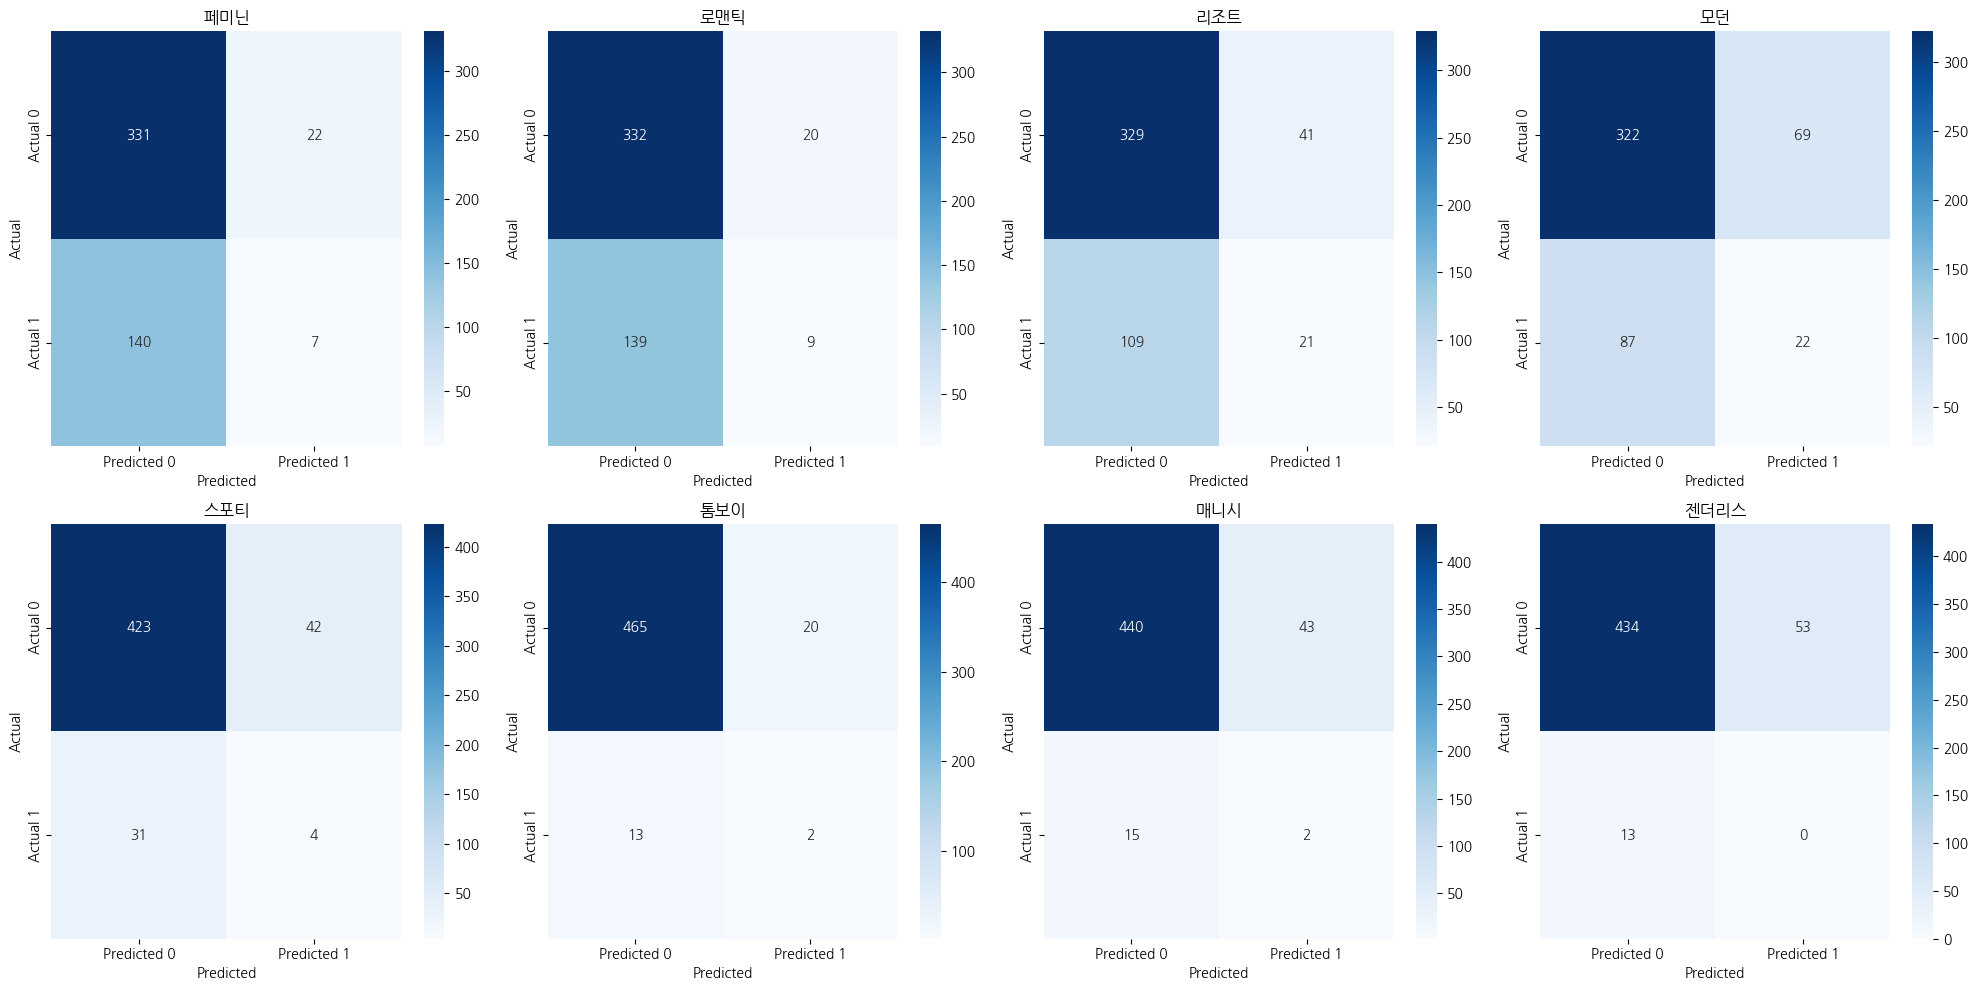

In [13]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import torch.nn as nn

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 정의 및 로드
model = models.resnet50()
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.4),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.4),
    nn.Linear(256, 8)  # 클래스 수에 맞게 수정
)
model.load_state_dict(torch.load('val_acc_best_model_v7.pth'))
model = model.to(device)
model.eval()

# 데이터셋 클래스 정의
class ClothesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.transform = transform
        self.image_paths = df['Image Path'].to_numpy()
        self.labels = df.iloc[:, 1:-1].astype(np.float32).to_numpy()  # 이 부분에서 타입 변환 추가
        print(f'Labels shape: {self.labels.shape}')
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None

        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

def collate_fn(batch):
    batch = [item for item in batch if item[0] is not None]
    if len(batch) == 0:
        print("No valid items in batch")
        return torch.Tensor(), torch.Tensor()
    return torch.utils.data.dataloader.default_collate(batch)

# 데이터프레임 로드 및 샘플링
df = pd.read_csv('cut_image_labeling_dataset.csv')
df_sampled = df.sample(n=500, random_state=42).reset_index(drop=True)

# 데이터셋 및 데이터로더 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = ClothesDataset(df_sampled, transform=transform)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0, collate_fn=collate_fn)

# 예측 수행 및 실제 라벨 수집
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        preds = (outputs > 0.5).float()
        
        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds.cpu().numpy())

all_labels = np.vstack(all_labels)
all_preds = np.vstack(all_preds)

# 각 클래스별 혼돈 행렬 계산 및 시각화
def plot_combined_confusion_matrix(y_true, y_pred, class_names):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, class_name in enumerate(class_names):
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
        sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues', ax=axes[i])
        axes[i].set_title(class_name)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

class_names = df.columns[1:-1].tolist()  # 첫 번째 열은 이미지 경로이므로 제외
plot_combined_confusion_matrix(all_labels, all_preds, class_names)


Labels shape: (500, 8)


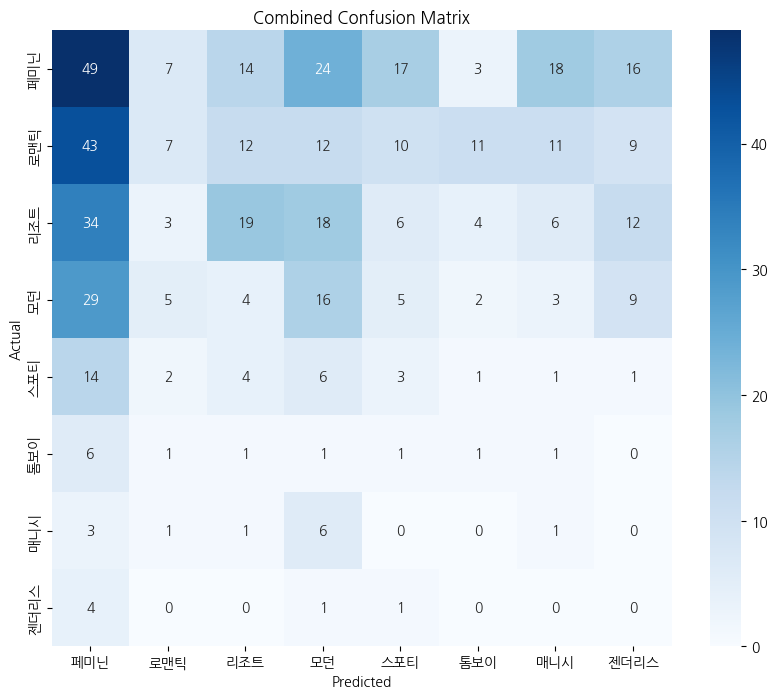

In [15]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import torch.nn as nn
import koreanize_matplotlib


# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 정의 및 로드
model = models.resnet50()
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.4),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.4),
    nn.Linear(256, 8)  # 클래스 수에 맞게 수정
)
model.load_state_dict(torch.load('val_acc_best_model_v7.pth'))
model = model.to(device)
model.eval()

# 데이터셋 클래스 정의
class ClothesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.transform = transform
        self.image_paths = df['Image Path'].to_numpy()
        self.labels = df.iloc[:, 1:-1].astype(np.float32).to_numpy()  # 이 부분에서 타입 변환 추가
        print(f'Labels shape: {self.labels.shape}')
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None

        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

def collate_fn(batch):
    batch = [item for item in batch if item[0] is not None]
    if len(batch) == 0:
        print("No valid items in batch")
        return torch.Tensor(), torch.Tensor()
    return torch.utils.data.dataloader.default_collate(batch)

# 데이터프레임 로드 및 샘플링
df = pd.read_csv('cut_image_labeling_dataset.csv')
df_sampled = df.sample(n=500, random_state=42).reset_index(drop=True)

# 데이터셋 및 데이터로더 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = ClothesDataset(df_sampled, transform=transform)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0, collate_fn=collate_fn)

# 예측 수행 및 실제 라벨 수집
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        preds = (outputs > 0.5).float()
        
        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds.cpu().numpy())

all_labels = np.vstack(all_labels)
all_preds = np.vstack(all_preds)

# 클래스별 혼돈 행렬 계산 및 시각화
def plot_combined_confusion_matrix(y_true, y_pred, class_names):
    num_classes = len(class_names)
    combined_cm = np.zeros((num_classes, num_classes), dtype=int)
    
    for true_labels, pred_labels in zip(y_true, y_pred):
        for true_label, pred_label in zip(true_labels, pred_labels):
            combined_cm[int(true_label), int(pred_label)] += 1
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(combined_cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Combined Confusion Matrix')
    plt.show()

# 단일 라벨 혼돈 행렬 계산 및 시각화
def plot_combined_confusion_matrix_single_label(y_true, y_pred, class_names):
    y_true_flat = np.argmax(y_true, axis=1)
    y_pred_flat = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true_flat, y_pred_flat)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Combined Confusion Matrix')
    plt.show()

class_names = df.columns[1:-1].tolist()  # 첫 번째 열은 이미지 경로이므로 제외
plot_combined_confusion_matrix_single_label(all_labels, all_preds, class_names)


Labels shape: (500, 8)


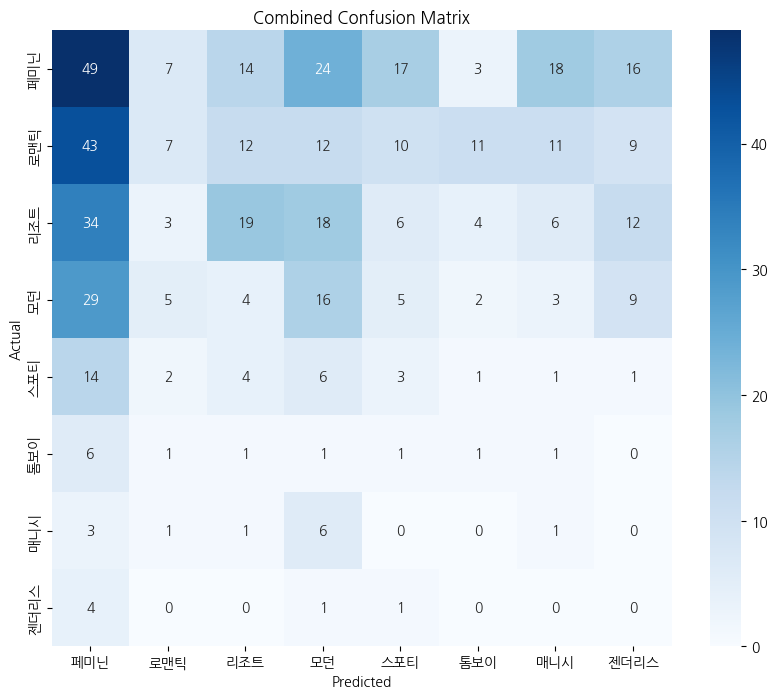

In [16]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import torch.nn as nn
import koreanize_matplotlib

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 정의 및 로드
model = models.resnet50()
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.4),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.4),
    nn.Linear(256, 8)  # 클래스 수에 맞게 수정
)
model.load_state_dict(torch.load('val_acc_best_model_v7.pth'))
model = model.to(device)
model.eval()

# 데이터셋 클래스 정의
class ClothesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.transform = transform
        self.image_paths = df['Image Path'].to_numpy()
        self.labels = df.iloc[:, 1:-1].astype(np.float32).to_numpy()  # 이 부분에서 타입 변환 추가
        print(f'Labels shape: {self.labels.shape}')
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None

        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

def collate_fn(batch):
    batch = [item for item in batch if item[0] is not None]
    if len(batch) == 0:
        print("No valid items in batch")
        return torch.Tensor(), torch.Tensor()
    return torch.utils.data.dataloader.default_collate(batch)

# 데이터프레임 로드 및 샘플링
df = pd.read_csv('cut_image_labeling_dataset.csv')
df_sampled = df.sample(n=500, random_state=42).reset_index(drop=True)

# 데이터셋 및 데이터로더 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = ClothesDataset(df_sampled, transform=transform)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0, collate_fn=collate_fn)

# 예측 수행 및 실제 라벨 수집
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        preds = (outputs > 0.5).float()
        
        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds.cpu().numpy())

all_labels = np.vstack(all_labels)
all_preds = np.vstack(all_preds)

# 다중 라벨 데이터를 단일 라벨로 변환
y_true_flat = np.argmax(all_labels, axis=1)
y_pred_flat = np.argmax(all_preds, axis=1)

# 혼돈 행렬 계산 및 시각화
def plot_combined_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Combined Confusion Matrix')
    plt.show()

class_names = df.columns[1:-1].tolist()  # 첫 번째 열은 이미지 경로이므로 제외
plot_combined_confusion_matrix(y_true_flat, y_pred_flat, class_names)


Labels shape: (500, 8)


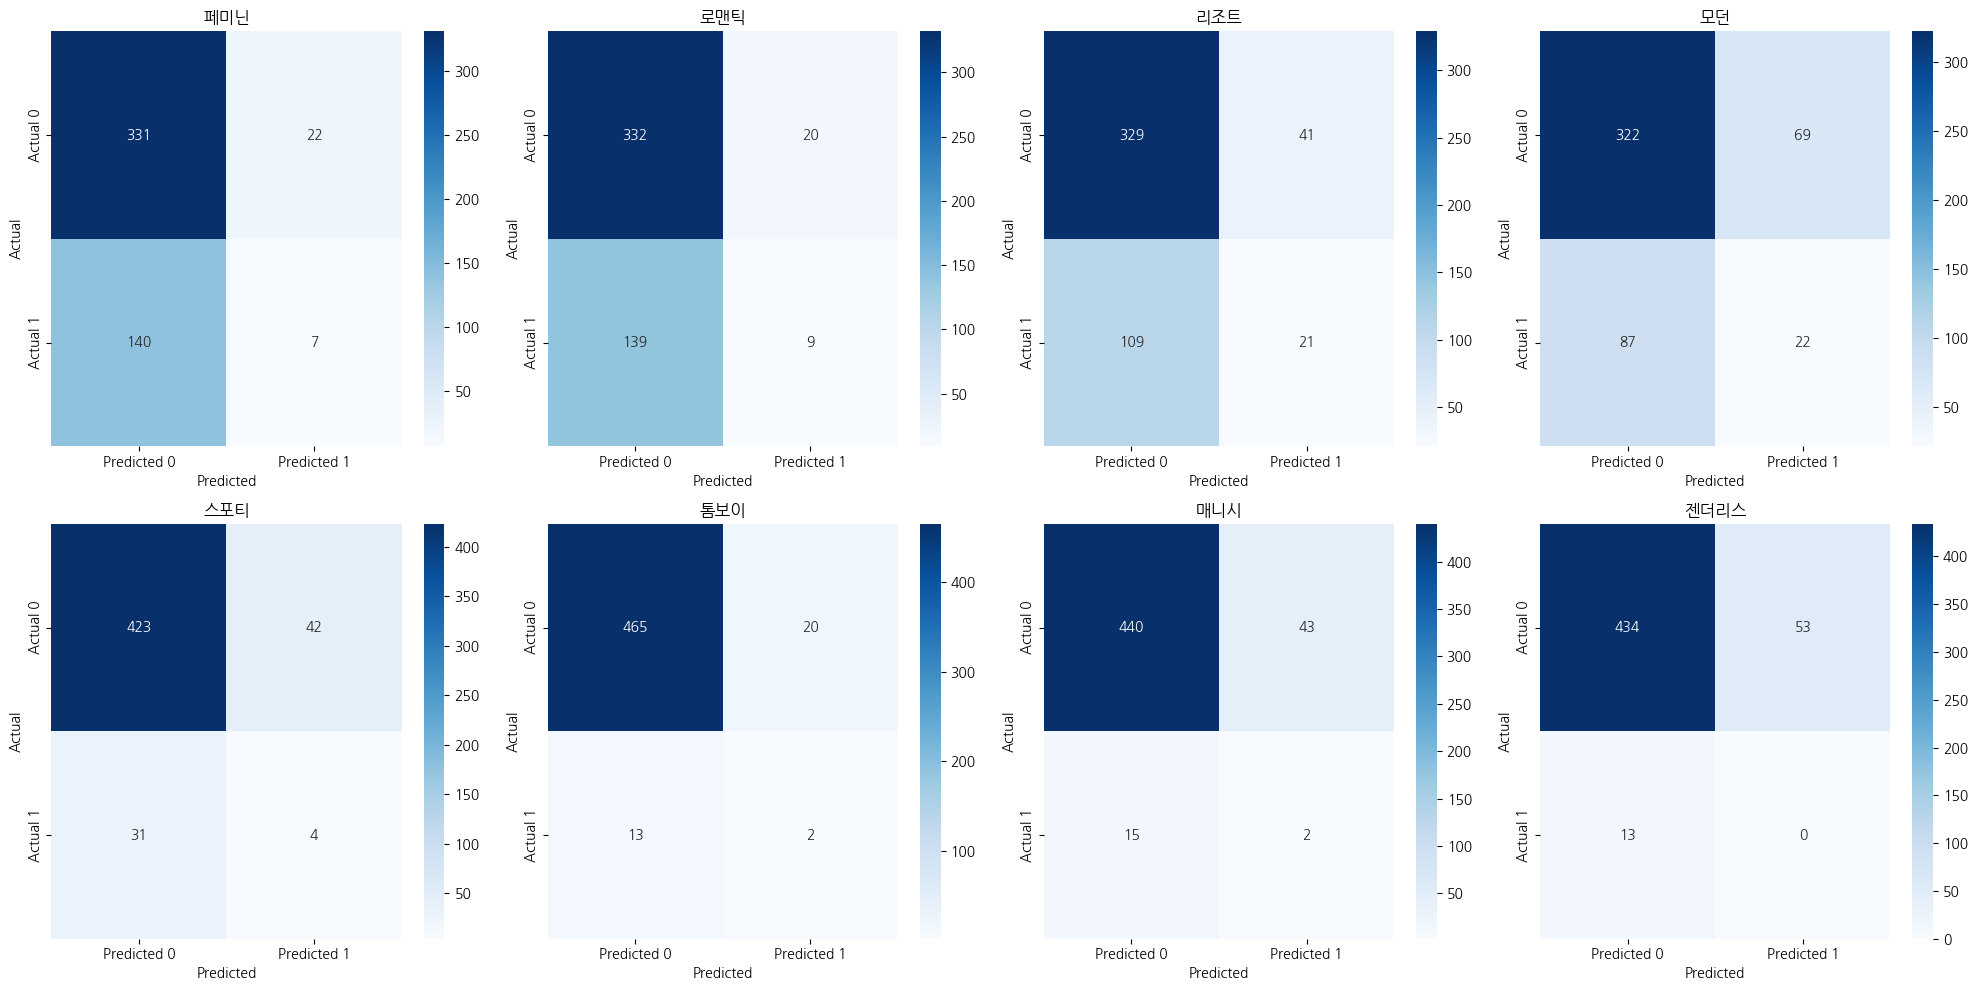

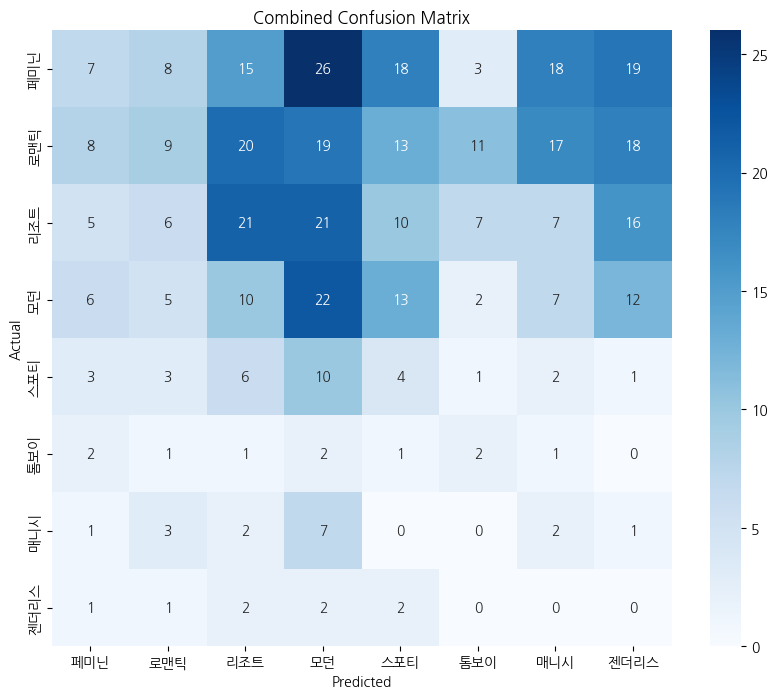

In [17]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import torch.nn as nn

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 정의 및 로드
model = models.resnet50()
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.4),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.4),
    nn.Linear(256, 8)  # 클래스 수에 맞게 수정
)
model.load_state_dict(torch.load('val_acc_best_model_v7.pth'))
model = model.to(device)
model.eval()

# 데이터셋 클래스 정의
class ClothesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.transform = transform
        self.image_paths = df['Image Path'].to_numpy()
        self.labels = df.iloc[:, 1:-1].astype(np.float32).to_numpy()  # 이 부분에서 타입 변환 추가
        print(f'Labels shape: {self.labels.shape}')
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None

        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

def collate_fn(batch):
    batch = [item for item in batch if item[0] is not None]
    if len(batch) == 0:
        print("No valid items in batch")
        return torch.Tensor(), torch.Tensor()
    return torch.utils.data.dataloader.default_collate(batch)

# 데이터프레임 로드 및 샘플링
df = pd.read_csv('cut_image_labeling_dataset.csv')
df_sampled = df.sample(n=500, random_state=42).reset_index(drop=True)

# 데이터셋 및 데이터로더 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = ClothesDataset(df_sampled, transform=transform)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0, collate_fn=collate_fn)

# 예측 수행 및 실제 라벨 수집
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        preds = (outputs > 0.5).float()
        
        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds.cpu().numpy())

all_labels = np.vstack(all_labels)
all_preds = np.vstack(all_preds)

# 각 클래스별 혼돈 행렬 계산 및 시각화
def plot_individual_confusion_matrices(y_true, y_pred, class_names):
    num_classes = len(class_names)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i in range(num_classes):
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
        sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues', ax=axes[i])
        axes[i].set_title(class_names[i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

# 전체 데이터에 대한 혼돈 행렬 계산 및 시각화
def plot_combined_confusion_matrix(y_true, y_pred, class_names):
    num_classes = len(class_names)
    combined_cm = np.zeros((num_classes, num_classes), dtype=int)
    
    for true_labels, pred_labels in zip(y_true, y_pred):
        true_index = np.where(true_labels == 1)[0]
        pred_index = np.where(pred_labels == 1)[0]
        
        for ti in true_index:
            for pi in pred_index:
                combined_cm[ti, pi] += 1
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(combined_cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Combined Confusion Matrix')
    plt.show()

class_names = df.columns[1:-1].tolist()  # 첫 번째 열은 이미지 경로이므로 제외

# 개별 혼돈 행렬 시각화
plot_individual_confusion_matrices(all_labels, all_preds, class_names)

# 전체 데이터에 대한 혼돈 행렬 시각화
plot_combined_confusion_matrix(all_labels, all_preds, class_names)
